In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.409919,0.686139,2.180502e-08,0.379790,0.649234,-0.024830,0.364491,0.587475,-0.036529,0.388313,...,0.463415,0.506736,-0.040313,0.456185,0.533282,-0.032452,0.448856,0.553109,-0.021755,1
1,0.424121,0.684603,9.527437e-08,0.396557,0.650929,-0.034831,0.388421,0.587323,-0.047745,0.416777,...,0.479515,0.506293,-0.030823,0.477457,0.533045,-0.026912,0.467976,0.552047,-0.018042,1
2,0.423936,0.692062,8.493976e-08,0.412209,0.650847,-0.049431,0.418759,0.587818,-0.062728,0.448390,...,0.485831,0.503450,-0.012881,0.486376,0.530620,-0.012250,0.474477,0.553264,-0.004513,1
3,0.422660,0.687833,6.537085e-08,0.419216,0.650069,-0.054825,0.428519,0.587345,-0.068124,0.456232,...,0.484324,0.504416,-0.013930,0.483966,0.536624,-0.015443,0.465106,0.555164,-0.009802,1
4,0.418687,0.678617,7.238484e-08,0.416476,0.639626,-0.053836,0.426737,0.577785,-0.066688,0.453912,...,0.482818,0.495503,-0.008790,0.481859,0.526467,-0.009747,0.463368,0.546298,-0.004011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.476094,0.659761,6.221980e-08,0.434873,0.631752,-0.015656,0.402030,0.577816,-0.028348,0.377017,...,0.520760,0.444875,-0.037292,0.526116,0.404724,-0.036934,0.530730,0.369250,-0.035657,ok
295,0.485482,0.652300,2.122714e-08,0.444650,0.626288,-0.014053,0.411964,0.572467,-0.024287,0.406917,...,0.512804,0.428758,-0.032242,0.513485,0.392170,-0.032115,0.513692,0.359639,-0.031935,ok
296,0.492400,0.637737,2.604011e-07,0.464597,0.616693,-0.036850,0.447929,0.570669,-0.055087,0.460784,...,0.492387,0.420163,-0.023581,0.487287,0.384210,-0.025927,0.482206,0.353350,-0.026634,ok
297,0.494126,0.640753,3.753828e-07,0.494931,0.615297,-0.058673,0.500635,0.567502,-0.078678,0.522330,...,0.516192,0.445723,0.002891,0.525507,0.454097,0.002126,0.521037,0.463299,0.006813,ok


In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.409919,0.686139,2.180502e-08,0.379790,0.649234,-0.024830,0.364491,0.587475,-0.036529,0.388313,...,0.463415,0.506736,-0.040313,0.456185,0.533282,-0.032452,0.448856,0.553109,-0.021755,1
1,0.424121,0.684603,9.527437e-08,0.396557,0.650929,-0.034831,0.388421,0.587323,-0.047745,0.416777,...,0.479515,0.506293,-0.030823,0.477457,0.533045,-0.026912,0.467976,0.552047,-0.018042,1
2,0.423936,0.692062,8.493976e-08,0.412209,0.650847,-0.049431,0.418759,0.587818,-0.062728,0.448390,...,0.485831,0.503450,-0.012881,0.486376,0.530620,-0.012250,0.474477,0.553264,-0.004513,1
3,0.422660,0.687833,6.537085e-08,0.419216,0.650069,-0.054825,0.428519,0.587345,-0.068124,0.456232,...,0.484324,0.504416,-0.013930,0.483966,0.536624,-0.015443,0.465106,0.555164,-0.009802,1
4,0.418687,0.678617,7.238484e-08,0.416476,0.639626,-0.053836,0.426737,0.577785,-0.066688,0.453912,...,0.482818,0.495503,-0.008790,0.481859,0.526467,-0.009747,0.463368,0.546298,-0.004011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.476094,0.659761,6.221980e-08,0.434873,0.631752,-0.015656,0.402030,0.577816,-0.028348,0.377017,...,0.520760,0.444875,-0.037292,0.526116,0.404724,-0.036934,0.530730,0.369250,-0.035657,ok
295,0.485482,0.652300,2.122714e-08,0.444650,0.626288,-0.014053,0.411964,0.572467,-0.024287,0.406917,...,0.512804,0.428758,-0.032242,0.513485,0.392170,-0.032115,0.513692,0.359639,-0.031935,ok
296,0.492400,0.637737,2.604011e-07,0.464597,0.616693,-0.036850,0.447929,0.570669,-0.055087,0.460784,...,0.492387,0.420163,-0.023581,0.487287,0.384210,-0.025927,0.482206,0.353350,-0.026634,ok
297,0.494126,0.640753,3.753828e-07,0.494931,0.615297,-0.058673,0.500635,0.567502,-0.078678,0.522330,...,0.516192,0.445723,0.002891,0.525507,0.454097,0.002126,0.521037,0.463299,0.006813,ok


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (299, 63)
Labels shape = (299,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [6]:
y_pred = svm.predict(x_test)
y_pred

array(['ok', '2', '1', 'ok', 'ok', '2', 'ok', 'ok', '1', '2', 'ok', '1',
       '2', 'ok', '1', '1', 'ok', '1', 'ok', 'ok', '2', '2', '2', '2',
       '2', '2', '2', 'ok', 'ok', 'ok', '1', '1', '1', '2', 'ok', '2',
       '2', '2', 'ok', '1', 'ok', '1', '1', '1', '1', '2', 'ok', '1', '1',
       '1', '1', 'ok', '2', '2', '1', 'ok', '2', '1', 'ok', '2'],
      dtype=object)

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.9833333333333333, 0.9833333333333333, 0.9833333333333333)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

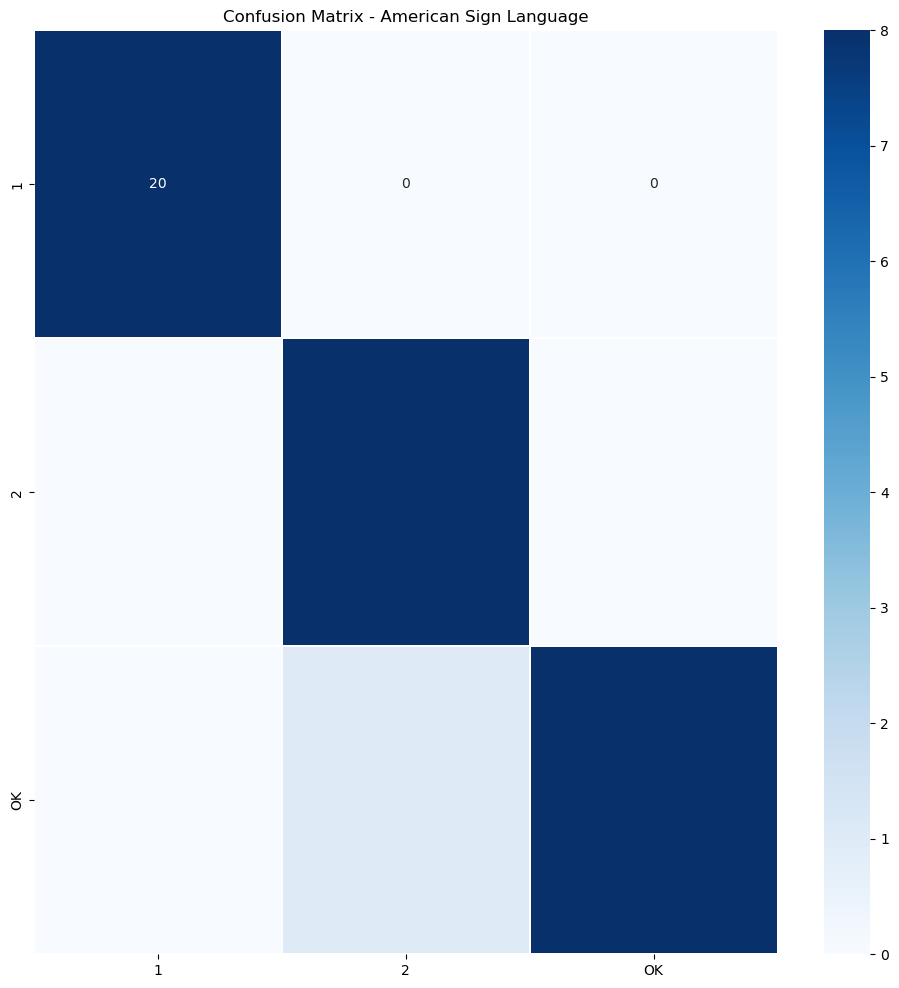

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [10]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)